
<br>
    The objective of this exercise is that you analyse the code provided and<br>
    make the link with the curse. You have to provide a short report that<br>
    comments and analyse the results. You can use directly the results or adapt<br>
    them to you needs.<br>


import the numerical library

In [1]:
import numpy as np
# import signal processing library
import scipy.signal as sp
# import ploting library
import pylab as py
py.ion()
py.close('all')

load the ecg signal

In [2]:
x = np.genfromtxt('respiration.dat')
# sampling frequency of the signal is 500 Hz
fs = 2
# generate correponding time vector
t = np.arange(len(x))/fs


 <br>
    The signal is a measurement of the breathing obtained by inductance<br>
    plethysmography.<br>
    The objective is to estimate the breathing frequency.<br>



 <br>
    The Hilbert transforms permits to estimate the instaneous amplitude and<br>
    phase of a narrow band signal. <br>
    Q: Comment the figures.<br>

   <span style="color:blue">We observe the breathing signal and its envelop given by the
 Hilbert trasform. We observe that the analytic signal does not concide with the envelope of the
 signal 

   Q: Why the envelope does no follow the maxima of the signal<br>
   
   <span style="color:blue">The raw breathing signal
 does not fullfil the requirement of being narrow band. There is no clearly defined carrier frequency,
 instead the spectrum of the signal is spread.


compute the analytical signal of x (Hilbert transform)

In [3]:
xa = sp.hilbert(x)

plot the signal

Text(0.5, 1.0, 'Breathing signal')

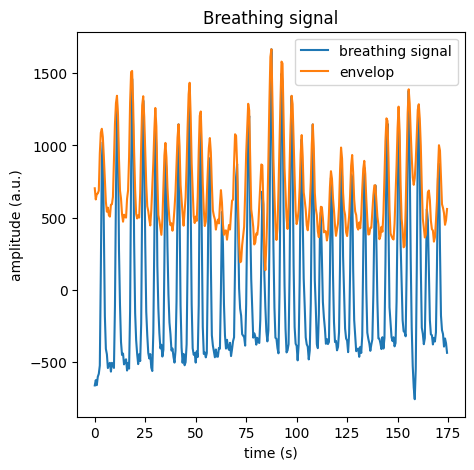

In [4]:
py.figure(1, figsize=[5,5])
py.clf()
py.plot(t, x, label='breathing signal')
py.plot(t, np.abs(xa), label='envelop')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.legend(loc='upper right')
py.title('Breathing signal')


<br>
    The raw breathing signal does not fullfil the requirement of narrow band.<br>
    The normal range of frequency for the breathing is within 0.1 to 0.25 Hz.<br>
    The signal is first filtered for this interval.<br>
Q: Comment the figures<br>

<span style="color:blue">In the figures, we see the breathing signal after filtering, with the corre
sponding analytical signal (constructed via the Hilbert transform) superimposed. After filtering,
 the signal has become approximately narrowband, meaning its energy is concentrated around a
 central frequency with only slow variations in amplitude and phase. Because of this narrowband
 property, the envelope of the analytic signal accurately tracks the true modulation of the breathing
 cycle. In other words, the smooth curve defined by the analytic signal now follows the oscillatory
 peaks of the real breathing waveform

Q: How is the estimation of the amplitude envelope.<br>
<span style="color:blue">The filtering removes higher-frequency components that would otherwise interfere and create spurious local maxima, making the envelope visually inconsistent. Once the breathing signal is constrained to a narrow frequency band, the analytic signal captures its amplitude modulation reliably, and the
 instantaneous amplitude (envelope) appears to follow the maxima of the waveform as expected.


Analogic limit of the passband frequency

In [5]:
f_pass = np.array([0.1, 0.25])
# Analogic limit of the stopband frequency
f_stop = np.array([0, 0.6])
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn, btype='band')
# Filter the signal
x_bp = sp.filtfilt(b ,a, x)

c:\Users\alexb\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\signal\_filter_design.py:4137: RuntimeWarning: divide by zero encountered in divide
  nat = ((stopb ** 2 - passb[0] * passb[1]) /


Compute the Hilbert transform.

In [6]:
xa = sp.hilbert(x_bp)

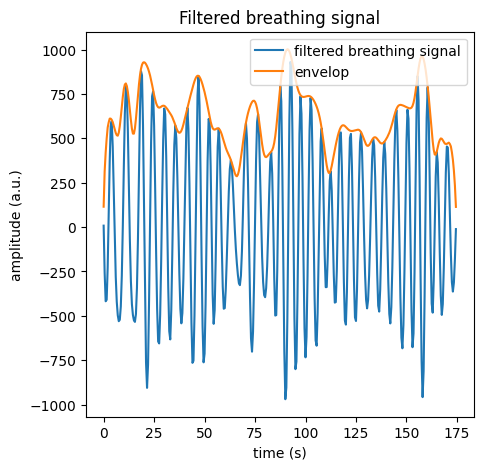

In [7]:
py.figure(2, figsize=[5,5])
py.clf()
py.plot(t, x_bp, label='filtered breathing signal')
py.plot(t, np.abs(xa), label='envelop')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('Filtered breathing signal')
py.legend(loc='upper right')


<br>
    The angle of the Hilbert transform gives the instaneous phase of the signal.<br>
Q: Comment the figure.<br>

<span style="color:blue">In the first plot we see the instantaneous phase of the analytic signal obtained through the Hilbert transform, computed with np.angle. By definition, this function restricts the phase
 values to the interval between- and . As the signal evolves over time, whenever the phase
 increases beyond ￿ or decreases below-, it is wrapped back into this range. This produces artificial
 discontinuities of 2, so the phase appears as a sawtooth-like curve with sudden jumps rather than a
 continuous trajectory

Q: What is the role of the unwrap function<br>
<span style="color:blue">In the second plot, the function np.unwrap has been applied to the signal. This approach detects the discontinuities of 2 and
 compensates them by adding or subtracting the appropriate multiples of 2. As a result, the phase
 no longer resets but evolves smoothly and continuously over time. The unwrapped phase therefore
 provides a representation of the real progression of the signal’s phase.


estimate the instantaneous phase from the Hilbert transform

In [8]:
phi_xa = np.angle(xa)
# phase is bounded between -pi and pi -> reconstruct continuous signal
phi_xa_unw = np.unwrap(phi_xa)

Text(0, 0.5, 'instantaneous phase unwrapped (rad)')

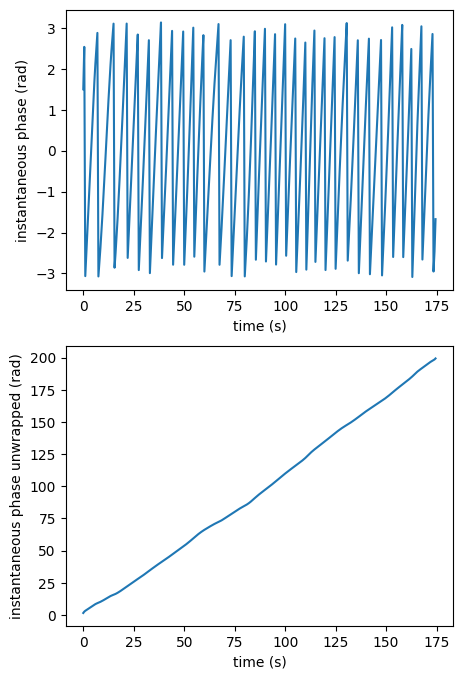

In [9]:
py.figure(3, figsize=[5, 8])
py.clf()
py.subplot(2,1,1)
py.plot(t, phi_xa)
py.xlabel('time (s)')
py.ylabel('instantaneous phase (rad)')
py.subplot(2,1,2)
py.plot(t, phi_xa_unw)
py.xlabel('time (s)')
py.ylabel('instantaneous phase unwrapped (rad)')


<br>
    The time derivate of the instaneous phase is the instaneous frequency of the<br>
    signal.<br>
Q: Comment the figure.<br>
<span style="color:blue">The first figure is the raw breathing signal in the time domain, showing the oscillatory waveform of inhalation and exhalation. Its amplitude varies, and the breathing cycles are clearly
 visible but irregular in depth and duration. The second figure shows the instantaneous breathing
 rate (in breaths per minute, bpm) obtained from the derivative of the unwrapped Hilbert phase. The
 breathing rate fluctuates over time, mostly between 8 and 14 bpm, which matches the physiological
 range for resting respiration. The curve captures variability in breathing frequency that may not
 be obvious from simply looking at the raw signal.

Q: Compare the original waveform with the estimation of the breathing<br>
       frequency<br>
<span style="color:blue"> The raw signal provides the shape and amplitude of
 breathing cycles, but extracting frequency directly from it is not straightforward, especially when
 the waveform is irregular or noisy. The Hilbert phase method transforms the oscillatory pattern into
 a smooth, continuous estimate of breathing rate, which makes it much easier to quantify frequency
 changes. While the waveform shows cycle-to-cycle variations, the frequency estimate condenses
 this into a time-varying rate curve. This highlights trends (slower/faster breathing) without being
 affected by amplitude changes.


compute the derivative of the phase (angular frequency).

In [10]:
d_phi = np.diff(phi_xa_unw)
# convert angular frequency to frequency.
d_phi /= 2*np.pi
# convert digital frequency to analog frequency and in breathing per minute
# (bpm)
d_phi *= fs*60

Text(0, 0.5, 'breathing rate (bpm)')

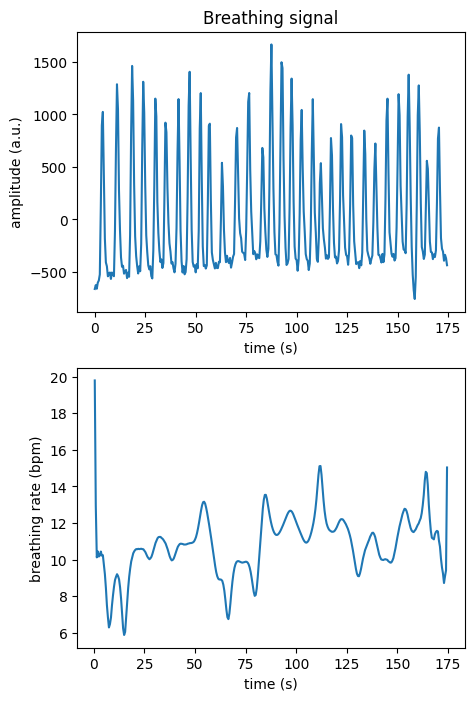

In [11]:
py.figure(4, figsize=[5,8])
py.clf()
py.subplot(2,1,1)
py.plot(t, x, label='breathing signal')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('Breathing signal')
py.subplot(2,1,2)
py.plot(t[1:], d_phi)
py.xlabel('time (s)')
py.ylabel('breathing rate (bpm)')